In [1]:
import numpy as np
import interpolation
import lobatto
import matplotlib.pyplot as plt
import matrix_generator
import system
import element
import sympy as sym

In [2]:
def linear(args, k=1.0):
    return k*(1+args['y'])

def dlinear(args, k=1.0):
    return k*np.ones_like(args['x'])

In [3]:
boundary = {'N':{'type':'dirichlet' ,'val':linear, 'args':["x","y"]},
              'E':{'type':'dirichlet' ,'val':linear,  'args':["x","y"]},
              'W':{'type':'dirichlet' ,'val':linear, 'args':["x","y"]}, 
              'S':{'type':'dirichlet' ,'val':linear, 'args':["x","y"]}}
n = 25
s = system.system(-1.0,1.0,-1.0,1.0,1,1,n,n, num_samples_x=100, exact=False)
s.elements

[[<element.element at 0x7f1940379f10>]]

In [4]:
s.add_property('T',linear,arg_params=['x','y'], sample=True)
s.set_boundaries('T', boundary)
s.ddy(var='T', outVar='dT',fluxType='centered')

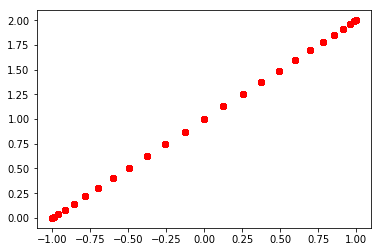

In [5]:
plt.plot(s.properties['y'],s.properties['T'],'ro'); plt.show()

In [6]:
x = s.properties['T'].ravel()
y = s.properties['dT'].ravel()

In [7]:
a = np.zeros_like(s.Dx)
a[::n,::n] = s.Fx.copy()
a[n-1::n,n-1::n] = -1*s.Fx.copy()
derx = -1*s.M_inv.dot(a + s.Dx)
der2x = derx.dot(derx)

a = np.zeros_like(s.Dy)
a[:n,:n] = s.Fy.copy()
a[-n:,-n:] = -1*s.Fy.copy()
dery = -1*s.M_inv.dot(a + s.Dy)
der2y = dery.dot(dery)

lap = der2x+der2y

In [8]:
lap[:n] = 0
lap[:n,:n] = np.eye(n)
lap[-n:] = 0
lap[-n:,-n:] = np.eye(n)

lap[::n] = 0
lap[::n,::n] = np.eye(n)
lap[n-1::n] = 0
lap[n-1::n,n-1::n] = np.eye(n)

#lap[:n,:n] = dery[:n,:n]
#lap[-n:,-n:] = dery[-n:,-n:]
#lap[n-1::n,n-1::n] = derx[n-1::n,n-1::n]

In [9]:
b = np.linalg.inv(lap)

In [10]:
y[:] = 0
y[:n]=0.0
y[-n:]=0.0
y[::n]=1.0
y[n-1::n]=0.0

In [16]:
ing = b.dot(y).reshape([n,n])

In [18]:
s.add_property('T',sample=True)
s.properties['T'][:] = ing

In [19]:
s.computeSample('T')

array([[  1.00000000e+00,  -1.29431868e-01,  -2.48135253e-03, ...,
          5.11614026e-05,   1.32073310e-03,   0.00000000e+00],
       [  1.00000000e+00,   8.81399829e-01,   7.64565368e-01, ...,
          1.15789130e-03,   5.62904402e-04,  -1.16633963e-14],
       [  1.00000000e+00,   9.37312007e-01,   8.77132300e-01, ...,
          2.28468888e-03,   1.14554703e-03,  -4.60061315e-15],
       ..., 
       [  1.00000000e+00,   9.37312103e-01,   8.77132432e-01, ...,
          2.28468916e-03,   1.14554717e-03,   3.51254837e-15],
       [  1.00000000e+00,   8.81399766e-01,   7.64565273e-01, ...,
          1.15789103e-03,   5.62904271e-04,  -3.58866070e-15],
       [  1.00000000e+00,  -1.29431868e-01,  -2.48135253e-03, ...,
          5.11614026e-05,   1.32073310e-03,   0.00000000e+00]])

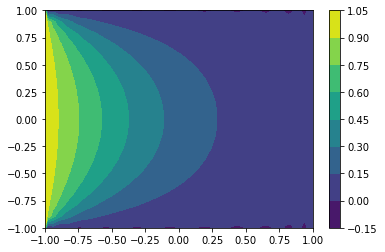

In [20]:
plt.contourf(s.properties['x_sample'],s.properties['y_sample'],s.properties['T_sample']);plt.colorbar();plt.show()

In [13]:
np.max(abs(b))

1.000000000000087